          RI     Na    Mg    Al     Si     K    Ca    Ba   Fe  Type
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0     1
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0     1
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0     1
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0     1
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0     1
..       ...    ...   ...   ...    ...   ...   ...   ...  ...   ...
209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0     7
210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0     7
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0     7
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0     7
213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0     7

[214 rows x 10 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  ----

<AxesSubplot:>

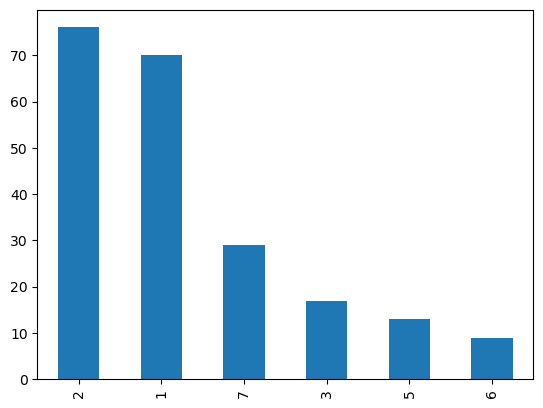

In [3]:
#1.Learn to use Cross validation to pick the best models.
import pandas as pd
import matplotlib.pyplot as plot
%matplotlib inline
import numpy as np
import os
os.chdir('F:\\Gurudatt\\gg\\Topmentor\\Batch64 Day31\\Batch64 Day31\\CS 44 Ans - Model Selection and Boosting-2')
os.getcwd()
data = pd.read_csv("glass.csv")
print(data)
data.info()
data["Type"].values
types = data["Type"].values
print(np.unique(types))
fig, ax = plot.subplots()
data['Type'].value_counts().plot(ax=ax, kind='bar')

In [4]:
#2.	Make a train_test split and fit a single decision tree classifier.
X, y = data.iloc[:, :-1].values, data.iloc[:, -1].values
print (X)

[[ 1.52101 13.64     4.49    ...  8.75     0.       0.     ]
 [ 1.51761 13.89     3.6     ...  7.83     0.       0.     ]
 [ 1.51618 13.53     3.55    ...  7.78     0.       0.     ]
 ...
 [ 1.52065 14.36     0.      ...  8.44     1.64     0.     ]
 [ 1.51651 14.38     0.      ...  8.48     1.57     0.     ]
 [ 1.51711 14.23     0.      ...  8.62     1.67     0.     ]]


In [5]:
print (y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 5 5 5 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6
 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]


In [6]:
from sklearn.preprocessing import LabelEncoder
gender_encoder = LabelEncoder()
y = gender_encoder.fit_transform(y)
print (y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5]


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(X_train.shape)

(171, 9)


In [8]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [9]:
y_predict = clf.predict(X_test)

In [10]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import  confusion_matrix
accuracy = accuracy_score(y_predict,y_test)
print(accuracy)
print(confusion_matrix(y_predict,y_test))

0.6976744186046512
[[14  2  1  0  0  0]
 [ 4  7  2  0  0  0]
 [ 1  0  3  0  0  0]
 [ 0  1  0  1  0  0]
 [ 0  1  0  0  1  0]
 [ 0  1  0  0  0  4]]


In [12]:
"""3.Make a k-fold split with 3 splits and measure the accuracy score with each split 
[Hint: Refer to KFold module under sklearn’s model selection.]"""
from sklearn.model_selection import KFold
from sklearn.metrics import  confusion_matrix
k_fold = KFold(3)
print(X_train.shape,y_train.shape)

(171, 9) (171,)


In [13]:
models =[]
for k in enumerate(k_fold.split(X_train, y_train)):
    clf.fit(X_train,y_train)
    print(clf.score(X_test,y_test))
    models.append(clf)

0.7209302325581395
0.7441860465116279
0.6976744186046512


In [14]:
y_predict = clf.predict(X_test)
print ( accuracy_score(y_predict,y_test))
print(confusion_matrix(y_predict,y_test))

0.6976744186046512
[[14  2  1  0  0  0]
 [ 3  7  2  0  0  0]
 [ 1  0  3  0  0  0]
 [ 0  1  0  1  0  0]
 [ 0  1  0  0  1  0]
 [ 1  1  0  0  0  4]]


In [15]:
"""4.Use gridSearchCV from sklearn for finding out a suitable number of estimators for a RandomForestClassifer 
along with a 10-fold cross validation.[Hint: Define a range of estimators and feed in range as param_grid]"""
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
n_estimators_range = [1,2,4,8,16,32]
grid_cv= GridSearchCV(RandomForestClassifier(),param_grid=dict(n_estimators=n_estimators_range),cv=KFold(10))
grid_cv.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [1, 2, 4, 8, 16, 32]})

In [16]:
grid_cv.best_score_

0.7601307189542483

In [17]:
grid_cv.best_estimator_

RandomForestClassifier(n_estimators=16)

In [18]:
y_predict = grid_cv.predict(X_test)
print ( accuracy_score(y_predict,y_test))
conf_mat = confusion_matrix(y_predict,y_test)
print(conf_mat)

0.7441860465116279
[[14  1  2  0  0  0]
 [ 2 10  2  0  0  0]
 [ 3  0  2  0  0  0]
 [ 0  0  0  1  0  0]
 [ 0  0  0  0  1  0]
 [ 0  1  0  0  0  4]]
